In [40]:
# !pip install -q -U google-generativeai

In [41]:
import os
from dotenv import load_dotenv

import pathlib
import textwrap

import google.generativeai as genai

In [42]:
# Load variables from the .env file into the environment
load_dotenv()

True

In [43]:
# Now you can access the variables using the os.environ dictionary
GOOGLE_API_KEY = os.environ.get("GOGLE_API_Key")
genai.configure(api_key=GOOGLE_API_KEY)

In [44]:
# utilizes the IPython library for displaying rich content in Jupyter notebooks or interactive Python environments.
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## List models

Now we're ready to call the Gemini API. Use `list_models` to see the available Gemini models:
FYR we have two models available witht his API Key.

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.s.

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

In [52]:
model = genai.GenerativeModel('gemini-pro')

The generate_content method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output

In [53]:
%%time
response = model.generate_content("What is generative AI?")

CPU times: total: 15.6 ms
Wall time: 9.43 s


In [54]:
to_markdown(response.text)

> Generative AI is an advanced type of artificial intelligence (AI) that can create new ideas, concepts, and creative content. It is based on the idea of generating new data from existing data, including text, images, audio, and video. Generative AI systems are trained on large datasets of existing data, and they use this data to learn the underlying patterns and structures of the data.
> 
> Once trained, generative AI systems can be used to create new content that is both original and realistic. This can be used for a variety of applications, including:
> 
> * **Art and music generation:** Generative AI can be used to create new works of art and music that are indistinguishable from human-generated content.
> * **Natural language processing:** Generative AI can be used to create new text, including articles, blog posts, and even entire books. It can also be used to generate new languages, or to translate text from one language to another.
> * **Image and video generation:** Generative AI can be used to create new images and videos, including realistic simulations of real-world objects and events.
> * **Game development:** Generative AI can be used to create new game characters, worlds, and levels. It can also be used to generate new challenges and quests for players to complete.
> 
> Generative AI is a rapidly developing field, and it has the potential to revolutionize the way we create and interact with content. As generative AI systems become more powerful and capable, we can expect to see them used in a wider variety of applications, such as marketing, advertising, healthcare, and education.
> 
> Here are some specific examples of how generative AI is being used today:
> 
> * **Image generation:** Generative AI has been used to create new images of people, places, and things that are indistinguishable from real-world images. For example, the website This Waif Does Not Exist uses generative AI to create new images of anime characters that look like they could be real people.
> * **Music generation:** Generative AI has been used to create new songs and musical compositions that are indistinguishable from human-generated music. For example, the website Jukebox uses generative AI to create new songs in a variety of styles, including pop, rock, and electronic.
> * **Text generation:** Generative AI has been used to create new text, including articles, blog posts, and even entire books. For example, the website Botnik Studios uses generative AI to create new text that is both original and realistic.
> * **Game development:** Generative AI has been used to create new game characters, worlds, and levels. For example, the game Minecraft uses generative AI to create new worlds that are procedurally generated.
> 
> These are just a few examples of the many ways that generative AI is being used today. As generative AI systems become more powerful and capable, we can expect to see them used in a wider variety of applications.

### Safety settings
The safety_settings argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions Uuse GenerateContentRespose.prompt_feedback to see if it was blocked due to saftey concerns regarding the prompt.

In [56]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called candidates, and you can review them to select the most suitable one as the response.

In [57]:
response.candidates

[index: 0
content {
  parts {
    text: "Generative AI is an advanced type of artificial intelligence (AI) that can create new ideas, concepts, and creative content. It is based on the idea of generating new data from existing data, including text, images, audio, and video. Generative AI systems are trained on large datasets of existing data, and they use this data to learn the underlying patterns and structures of the data.\n\nOnce trained, generative AI systems can be used to create new content that is both original and realistic. This can be used for a variety of applications, including:\n\n* **Art and music generation:** Generative AI can be used to create new works of art and music that are indistinguishable from human-generated content.\n* **Natural language processing:** Generative AI can be used to create new text, including articles, blog posts, and even entire books. It can also be used to generate new languages, or to translate text from one language to another.\n* **Image a

## Generate text from image and text inputs
Gemini provides a multimodal model (gemini-pro-vision) that accepts both text and images and inputs. The GenerativeModel.generate_content API is designed to handle multimodal prompts and returns a text output.

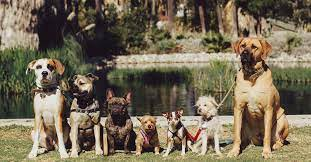

In [58]:
import PIL.Image

img = PIL.Image.open('many_dogs.jpg')
img

In [59]:
model = genai.GenerativeModel('gemini-pro-vision')

In [60]:
response = model.generate_content(img)

to_markdown(response.text)

>  A group of dogs of different breeds is sitting in a row in front of a pond on a sunny day.

In [61]:

response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the dogs in the picture, identify which of the dog is biggest.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  There are seven dogs in the picture. They are all different breeds and sizes. The biggest dog is a brown and white pit bull mix. The other dogs are a brown and white French bulldog, a black and white border collie, a brown and white chihuahua, a white and brown cocker spaniel, a black and white toy poodle, and a brown and white bichon frise. They are all sitting in a row on the grass, looking at the camera. They are all wearing different colored collars and harnesses. The background is a park with trees and a pond.

## Another example for image to text

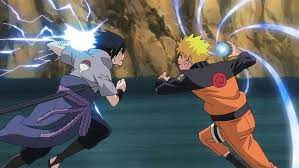

In [62]:
import PIL.Image

img = PIL.Image.open('naruto.jpg')
img

In [63]:
model = genai.GenerativeModel('gemini-pro-vision')

In [64]:
response = model.generate_content(img)

to_markdown(response.text)

>  The picture shows the two main characters from the anime series Naruto, Naruto Uzumaki and Sasuke Uchiha, engaged in a battle. Naruto is using his signature move, the Rasengan, while Sasuke is using his Chidori. The two attacks are about to collide, and the outcome of the battle is uncertain.

In [67]:
# promptting along with the image
response = model.generate_content(["Write a short, engaging story based on this picture. It should include a description of the powers of both charecteer in the picture, include who is going to win the fight.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  The two shinobi faced off against each other, their eyes filled with determination. Naruto, the knuckle-headed ninja, was ready to take on his rival, Sasuke, the avenger. 
> 
> Naruto charged at Sasuke, kunai in hand. Sasuke smirked and drew his sword. The two clashed, their weapons ringing out against each other. Naruto was fast, but Sasuke was more skilled. The two traded blows, neither one able to gain an advantage.
> 
> Suddenly, Naruto jumped back and formed a Rasengan, a ball of swirling chakra. Sasuke's eyes widened in surprise. He knew that the Rasengan was one of Naruto's most powerful techniques.
> 
> "Rasengan!" Naruto yelled, hurling the ball of chakra at Sasuke. Sasuke quickly formed a Chidori, a blade of lightning chakra. The two techniques collided, creating a massive explosion.
> 
> The smoke cleared, and Naruto and Sasuke were both standing, panting heavily. Naruto's Rasengan had been destroyed, but Sasuke's Chidori had pierced his shoulder.
> 
> "You're finished, Naruto," Sasuke said. "I'm going to avenge my clan."
> 
> Naruto smiled. "You're not going to win, Sasuke," he said. "I'm going to be the Hokage, and I'm going to bring peace to the ninja world."
> 
> Naruto charged at Sasuke again, and the two began to fight once more. The battle was fierce, but in the end, Naruto was victorious. He defeated Sasuke and saved the ninja world.

In [66]:
response = model.generate_content(["Write a detailed long engaging story based on this picture. It should include a description of the powers of both charecteer in the picture, include who is going to win the fight.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  The two shinobi faced each other on the battlefield, their eyes locked in a deadly stare. Naruto Uzumaki, the knuckle-headed ninja from the Hidden Leaf Village, and Sasuke Uchiha, the last of the Uchiha clan, were about to engage in a battle that would decide the fate of the world.
> 
> Naruto was a master of senjutsu, a form of chakra that allowed him to tap into the power of nature. He could use this power to enhance his strength, speed, and durability, and to create powerful jutsu. Sasuke, on the other hand, was a master of Chidori, a lightning-based jutsu that could cut through anything. He could also use his Sharingan, a powerful eye that allowed him to see the world in slow motion and to predict his opponent's moves.
> 
> The two shinobi charged at each other, their fists and feet flying. Naruto dodged Sasuke's Chidori and retaliated with a Rasengan, a powerful sphere of chakra. Sasuke dodged the Rasengan and countered with a Chidori Stream, a continuous stream of lightning that could cut through anything.
> 
> The two jutsu collided, creating a massive explosion. The smoke cleared, and the two shinobi were standing there, unharmed.
> 
> "You're strong, Naruto," Sasuke said. "But I'm stronger."
> 
> "We'll see about that," Naruto said.
> 
> The two shinobi charged at each other again, their fists and feet flying. The battle raged on, neither shinobi able to gain an advantage.
> 
> Finally, Naruto saw an opening and unleashed a massive Rasengan. Sasuke was caught in the blast, and he was sent flying into the ground.
> 
> Naruto stood over Sasuke, his Rasengan still smoking. "I win," he said.
> 
> Sasuke lay on the ground, defeated. "You're right," he said. "You're stronger than me."
> 
> Naruto turned and walked away, leaving Sasuke to his fate.
> 
> The battle was over, and Naruto had won. He had saved the world from Sasuke, and he had proven that he was the strongest shinobi in the world.

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [68]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [69]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer takes in information, processes it, and stores it for later use.

In [70]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
to_markdown(response.text)

> A computer is an electronic device that accepts data (input), processes it according to a set of instructions (program), and produces a result (output), all under the control of a stored program.
> 
> Here's a simplified analogy:
> 
> Imagine a computer as a powerful calculator that can follow a list of instructions (program) to perform tasks. It has three main parts:
> 
> 1. **Input Devices:** These allow you to give the computer information, such as a keyboard, mouse, or microphone.
> 
> 2. **Processor:** This is the "brain" of the computer that executes the instructions in the program.
> 
> 3. **Output Devices:** These show you the results of the program, such as a monitor, speakers, or printer.
> 
> When you run a program on a computer, the program's instructions are loaded into the processor. The processor then follows these instructions one by one, performing calculations and making decisions based on the data it receives from the input devices. The results of these calculations are then sent to the output devices.
> 
> This process happens very quickly, millions of times per second, allowing computers to perform complex tasks like playing games, editing videos, or even understanding human speech.

### printing the history

In [71]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer takes in information, processes it, and stores it for later use.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that accepts data (input), processes it according to a set of instructions (program), and produces a result (output), all under the control of a stored program.
> 
> Here's a simplified analogy:
> 
> Imagine a computer as a powerful calculator that can follow a list of instructions (program) to perform tasks. It has three main parts:
> 
> 1. **Input Devices:** These allow you to give the computer information, such as a keyboard, mouse, or microphone.
> 
> 2. **Processor:** This is the "brain" of the computer that executes the instructions in the program.
> 
> 3. **Output Devices:** These show you the results of the program, such as a monitor, speakers, or printer.
> 
> When you run a program on a computer, the program's instructions are loaded into the processor. The processor then follows these instructions one by one, performing calculations and making decisions based on the data it receives from the input devices. The results of these calculations are then sent to the output devices.
> 
> This process happens very quickly, millions of times per second, allowing computers to perform complex tasks like playing games, editing videos, or even understanding human speech.

# Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [72]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


## ----------------------------------------------------------------------------------

Note: The retrieval_document task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in content:

In [73]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


# Document Q&A with ChromaDB

In [74]:
# imports
import textwrap
import chromadb
import numpy as np
import pandas as pd

import google.generativeai as genai
import google.ai.generativelanguage as glm

from IPython.display import Markdown
from chromadb import Documents, EmbeddingFunction, Embeddings

### Data
Here is a small set of documents you will use to create an embedding database:

In [75]:
DOCUMENT1 = "Operating the Climate Control System  Your Googlecar has a climate control system that allows you to adjust the temperature and airflow in the car. To operate the climate control system, use the buttons and knobs located on the center console.  Temperature: The temperature knob controls the temperature inside the car. Turn the knob clockwise to increase the temperature or counterclockwise to decrease the temperature. Airflow: The airflow knob controls the amount of airflow inside the car. Turn the knob clockwise to increase the airflow or counterclockwise to decrease the airflow. Fan speed: The fan speed knob controls the speed of the fan. Turn the knob clockwise to increase the fan speed or counterclockwise to decrease the fan speed. Mode: The mode button allows you to select the desired mode. The available modes are: Auto: The car will automatically adjust the temperature and airflow to maintain a comfortable level. Cool: The car will blow cool air into the car. Heat: The car will blow warm air into the car. Defrost: The car will blow warm air onto the windshield to defrost it."
DOCUMENT2 = "Your Googlecar has a large touchscreen display that provides access to a variety of features, including navigation, entertainment, and climate control. To use the touchscreen display, simply touch the desired icon.  For example, you can touch the \"Navigation\" icon to get directions to your destination or touch the \"Music\" icon to play your favorite songs."
DOCUMENT3 = "Shifting Gears Your Googlecar has an automatic transmission. To shift gears, simply move the shift lever to the desired position.  Park: This position is used when you are parked. The wheels are locked and the car cannot move. Reverse: This position is used to back up. Neutral: This position is used when you are stopped at a light or in traffic. The car is not in gear and will not move unless you press the gas pedal. Drive: This position is used to drive forward. Low: This position is used for driving in snow or other slippery conditions."

documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3]

### create embd

In [76]:
class GeminiEmbeddingFunction(EmbeddingFunction):
  def __call__(self, input: Documents) -> Embeddings:
    model = 'models/embedding-001'
    title = "Custom query"
    return genai.embed_content(model=model,
                                content=input,
                                task_type="retrieval_document",
                                title=title)["embedding"]

def create_chroma_db(documents, name):
  chroma_client = chromadb.Client()
  db = chroma_client.create_collection(name=name, embedding_function=GeminiEmbeddingFunction())

  for i, d in enumerate(documents):
    db.add(
      documents=d,
      ids=str(i)
    )
  return db

In [81]:
# Set up the DB
db = create_chroma_db(documents, "googlecarsdatabase")

In [82]:
pd.DataFrame(db.peek(3))

,ids,embeddings,metadatas,documents,uris,data
0,0,"[-0.020994942635297775, -0.03876612335443497, ...",None,Operating the Climate Control System Your Goo...,None,None
1,1,"[0.017410801723599434, -0.04757162556052208, -...",None,Your Googlecar has a large touchscreen display...,None,None
2,2,"[-0.03194405511021614, -0.023281503468751907, ...",None,Shifting Gears Your Googlecar has an automatic...,None,None


### Getting the relevant document

In [83]:
def get_relevant_passage(query, db):
  passage = db.query(query_texts=[query], n_results=1)['documents'][0][0]
  return passage

In [84]:
# Perform embedding search
passage = get_relevant_passage("touch screen features", db)
Markdown(passage)

Your Googlecar has a large touchscreen display that provides access to a variety of features, including navigation, entertainment, and climate control. To use the touchscreen display, simply touch the desired icon.  For example, you can touch the "Navigation" icon to get directions to your destination or touch the "Music" icon to play your favorite songs.

#### Now that you have found the relevant passage in your set of documents, you can use it make a prompt to pass into the Gemini API.

In [85]:
def make_prompt(query, relevant_passage):
  escaped = relevant_passage.replace("'", "").replace('"', "").replace("\n", " ")
  prompt = ("""You are a helpful and informative bot that answers questions using text from the reference passage included below. \
  Be sure to respond in a complete sentence, being comprehensive, including all relevant background information. \
  However, you are talking to a non-technical audience, so be sure to break down complicated concepts and \
  strike a friendly and converstional tone. \
  If the passage is irrelevant to the answer, you may ignore it.
  QUESTION: '{query}'
  PASSAGE: '{relevant_passage}'

    ANSWER:
  """).format(query=query, relevant_passage=escaped)

  return prompt
     

#### Pass a query to the prompt: ---->>>> Printing the prompt

In [86]:
query = "How do you use the touchscreen in the Google car?"
prompt = make_prompt(query, passage)
Markdown(prompt)

You are a helpful and informative bot that answers questions using text from the reference passage included below.   Be sure to respond in a complete sentence, being comprehensive, including all relevant background information.   However, you are talking to a non-technical audience, so be sure to break down complicated concepts and   strike a friendly and converstional tone.   If the passage is irrelevant to the answer, you may ignore it.
  QUESTION: 'How do you use the touchscreen in the Google car?'
  PASSAGE: 'Your Googlecar has a large touchscreen display that provides access to a variety of features, including navigation, entertainment, and climate control. To use the touchscreen display, simply touch the desired icon.  For example, you can touch the Navigation icon to get directions to your destination or touch the Music icon to play your favorite songs.'

    ANSWER:
  

#### Now use the generate_content method to to generate a response from the model.

In [80]:
model = genai.GenerativeModel('gemini-pro')
answer = model.generate_content(prompt)
Markdown(answer.text)

In the Google car, you can interact with the large touchscreen display simply by touching the icons that represent the features you want to use. For instance, to get directions, tap the Navigation icon; to play music, tap the Music icon, and so on.